## Introduction

In this project, I will be analyzing data for netflix stock for the year 2017. I will be creating visuals to extract and analyze key data. I will create a visual for: 
+ The distribution of the stock prices for the past year
+ Netflix's earnings and revenue in the last four quarters
+ The actual vs. estimated earnings per share for the four quarters in 2017
+ A comparison of the Netflix Stock price vs the Dow Jones Industrial Average price in 2017 

I will also be using the Dow Jones Industrial Average to compare  Netflix stock to the larger stock market, and all key data are stored in a CSV file. 

This project is helpful in order to analyze, prepare, and plot data that may be helpful for financial analysts. 

Financial Data Source: [Yahoo Finance](https://finance.yahoo.com/quote/DATA/)


## Importing the relevant modules 
Importing pyplot, pandas and seaborn to be used 

In [1]:
from matplotlib import pyplot as plt 
import pandas as pd
import seaborn as sns

## Load the Dataframes and inspect

Load **NFLX.csv** into a DataFrame called netflix_stocks, then inspect the file (it has 12 entries for the 12 months of 2017)


In [18]:
netflix_stocks = pd.read_csv(r"C:\Users\sanvi\Downloads\Netflix Stocks Capstone\Netflix Stocks Capstone\Datasets\NFLX.csv")
netflix_stocks.head(12)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-01,124.959999,143.460007,124.309998,140.710007,140.710007,181772200
1,2017-02-01,141.199997,145.949997,139.050003,142.130005,142.130005,91432000
2,2017-03-01,142.839996,148.289993,138.259995,147.809998,147.809998,110692700
3,2017-04-01,146.699997,153.520004,138.660004,152.199997,152.199997,149769200
4,2017-05-01,151.910004,164.750000,151.610001,163.070007,163.070007,116795800
5,2017-06-01,163.520004,166.869995,147.300003,149.410004,149.410004,135675800
6,2017-07-01,149.800003,191.500000,144.250000,181.660004,181.660004,185144700
7,2017-08-01,182.490005,184.619995,164.229996,174.710007,174.710007,136523100
8,2017-09-01,175.550003,189.949997,172.440002,181.350006,181.350006,111427900
9,2017-10-01,182.110001,204.380005,176.580002,196.429993,196.429993,208657800


Load **DJI.csv** into a DataFrame called dowjones_stocks, then inspect the dataframe (12 entries)

In [8]:
dowjones_stocks = pd.read_csv(r"C:\Users\sanvi\Downloads\Netflix Stocks Capstone\Netflix Stocks Capstone\Datasets\DJI.csv")
dowjones_stocks.head(12)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-01,19872.859375,20125.580078,19677.939453,19864.089844,19864.089844,6482450000
1,2017-02-01,19923.810547,20851.330078,19831.089844,20812.240234,20812.240234,6185580000
2,2017-03-01,20957.289063,21169.109375,20412.800781,20663.220703,20663.220703,6941970000
3,2017-04-01,20665.169922,21070.900391,20379.550781,20940.509766,20940.509766,5392630000
4,2017-05-01,20962.730469,21112.320313,20553.449219,21008.650391,21008.650391,6613570000
5,2017-06-01,21030.550781,21535.029297,20994.220703,21349.630859,21349.630859,7214590000
6,2017-07-01,21392.300781,21929.800781,21279.300781,21891.119141,21891.119141,5569720000
7,2017-08-01,21961.419922,22179.109375,21600.339844,21948.099609,21948.099609,6150060000
8,2017-09-01,21981.769531,22419.509766,21709.630859,22405.089844,22405.089844,6342130000
9,2017-10-01,22423.470703,23485.250000,22416.000000,23377.240234,23377.240234,7302910000


Load **NFLX_daily_by_quarter.csv** into a DataFrame called netflix_stocks_quarterly, and then inspect the first 5 lines 

In [9]:
netflix_stocks_quarterly = pd.read_csv(r"C:\Users\sanvi\Downloads\Netflix Stocks Capstone\Netflix Stocks Capstone\Datasets\NFLX_daily_by_quarter.csv")
netflix_stocks_quarterly.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Quarter
0,2017-01-03,124.959999,128.190002,124.309998,127.489998,127.489998,9437900,Q1
1,2017-01-04,127.489998,130.169998,126.550003,129.410004,129.410004,7843600,Q1
2,2017-01-05,129.220001,132.750000,128.899994,131.809998,131.809998,10185500,Q1
3,2017-01-06,132.080002,133.880005,129.809998,131.070007,131.070007,10657900,Q1
4,2017-01-09,131.479996,131.990005,129.889999,130.949997,130.949997,5766900,Q1


## Changing column names 
The first two column names are one word each, and the only one that is not is `Adj Close`.  

The term `Adj Close` is a confusing term if you don't read the Yahoo Documentation. In Yahoo, `Adj Close` is documented as adjusted close price adjusted for both dividends and splits.

This means this is the column with the true closing price, so these data are very important.

Hence I change the column name from `Adj Close` to `Price` so that it is easier to work with the data, for all 3 dataframes


In [10]:
netflix_stocks.rename(columns = {
    "Adj Close": "Price"}, inplace = True)
dowjones_stocks.rename(columns = {
    "Adj Close": "Price"}, inplace = True)
netflix_stocks_quarterly.rename(columns = {
    "Adj Close": "Price"}, inplace = True)

Inspect the dataframe again to see if the changes applied 

In [11]:
netflix_stocks.head()

,Date,Open,High,Low,Close,Price,Volume
0,2017-01-01,124.959999,143.460007,124.309998,140.710007,140.710007,181772200
1,2017-02-01,141.199997,145.949997,139.050003,142.130005,142.130005,91432000
2,2017-03-01,142.839996,148.289993,138.259995,147.809998,147.809998,110692700
3,2017-04-01,146.699997,153.520004,138.660004,152.199997,152.199997,149769200
4,2017-05-01,151.910004,164.750000,151.610001,163.070007,163.070007,116795800


Check the other 2 dataframes to see if the changes applied to `dowjones_stocks` and `netflix_stocks_quarterly`.

In [12]:
dowjones_stocks.head()

,Date,Open,High,Low,Close,Price,Volume
0,2017-01-01,19872.859375,20125.580078,19677.939453,19864.089844,19864.089844,6482450000
1,2017-02-01,19923.810547,20851.330078,19831.089844,20812.240234,20812.240234,6185580000
2,2017-03-01,20957.289063,21169.109375,20412.800781,20663.220703,20663.220703,6941970000
3,2017-04-01,20665.169922,21070.900391,20379.550781,20940.509766,20940.509766,5392630000
4,2017-05-01,20962.730469,21112.320313,20553.449219,21008.650391,21008.650391,6613570000


In [13]:
netflix_stocks_quarterly.head()

,Date,Open,High,Low,Close,Price,Volume,Quarter
0,2017-01-03,124.959999,128.190002,124.309998,127.489998,127.489998,9437900,Q1
1,2017-01-04,127.489998,130.169998,126.550003,129.410004,129.410004,7843600,Q1
2,2017-01-05,129.220001,132.750000,128.899994,131.809998,131.809998,10185500,Q1
3,2017-01-06,132.080002,133.880005,129.809998,131.070007,131.070007,10657900,Q1
4,2017-01-09,131.479996,131.990005,129.889999,130.949997,130.949997,5766900,Q1


## Visualizing Netflix Stock Price Data With A Violinplot

In this step, we will be visualizing the Netflix quarterly data! 

We want to get an understanding of the distribution of the Netflix quarterly stock prices for 2017. Specifically, we want to see in which quarter stock prices flucutated the most. We can accomplish this using a violin plot with four violins, one for each business quarter. 


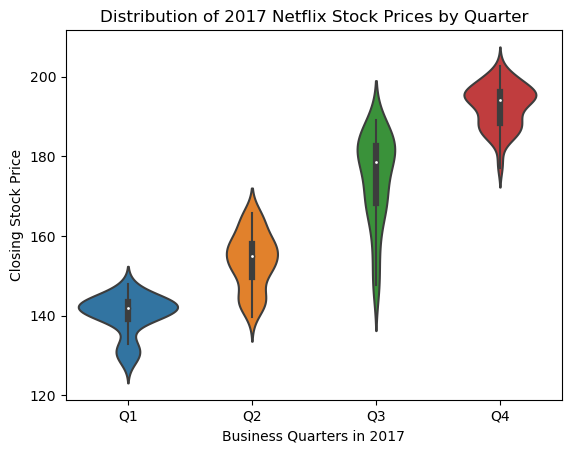

In [14]:
ax = sns.violinplot()
sns.violinplot(
    data = netflix_stocks_quarterly, 
    x = netflix_stocks_quarterly.Quarter, 
    y = netflix_stocks_quarterly.Price)
ax.set_title("Distribution of 2017 Netflix Stock Prices by Quarter")
plt.ylabel("Closing Stock Price")
plt.xlabel("Business Quarters in 2017")
plt.savefig("violinplot_nflx.png")
plt.show()

## Charting actual vs estimated EPS With a Scatterplot

Next, I will chart the performance of the earnings per share (EPS) by graphing the estimate Yahoo projected for the Quarter compared to the actual earnings for that quarters with a scatterplot


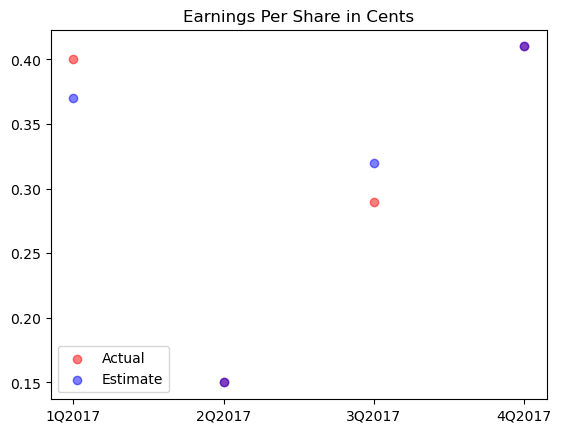

In [15]:
x_positions = [1, 2, 3, 4]
chart_labels = ["1Q2017","2Q2017","3Q2017","4Q2017"]
earnings_actual =[.4, .15,.29,.41]
earnings_estimate = [.37,.15,.32,.41 ]
plt.scatter(x_positions, earnings_actual, color= "red", alpha = 0.5)
plt.scatter(x_positions, earnings_estimate, color = "blue", alpha = 0.5)
plt.legend(["Actual", "Estimate"])
plt.xticks(x_positions, chart_labels)
plt.title("Earnings Per Share in Cents")
plt.savefig("scatterplot_EPS.png")
plt.show()


Note: The purple dots represent a quarter where actual EPS = Estimated EPS, and so the red and blue dots overlap to give purple

## Charting Revenue and Earnings to analyze profitability with a bargraph

Next, I will visualize the earnings and revenue reported by Netflix by mapping two bars side-by-side.

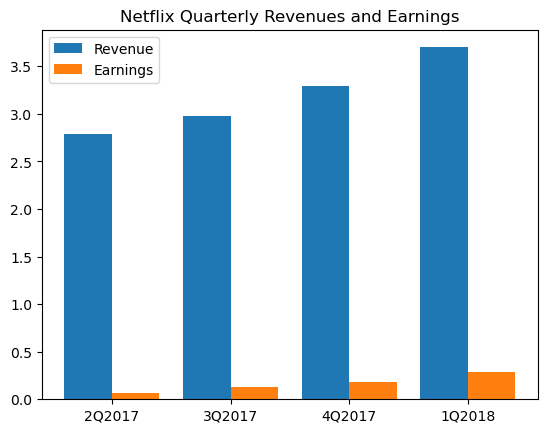

In [16]:
# The metrics below are in billions of dollars
revenue_by_quarter = [2.79, 2.98,3.29,3.7]
earnings_by_quarter = [.0656,.12959,.18552,.29012]
quarter_labels = ["2Q2017","3Q2017","4Q2017", "1Q2018"]

# Revenue
n = 1  # This is our first dataset (out of 2)
t = 2 # Number of dataset
d = len(revenue_by_quarter) # Number of sets of bars
w = 0.8 # Width of each bar
bars1_x = [t*element + w*n for element
             in range(d)]
plt.bar(bars1_x, revenue_by_quarter)


# Earnings
n = 2  # This is our second dataset (out of 2)
t = 2 # Number of dataset
d = len(earnings_by_quarter) # Number of sets of bars
w = 0.8 # Width of each bar
bars2_x = [t*element + w*n for element
             in range(d)]

plt.bar(bars2_x, earnings_by_quarter)



middle_x = [ (a + b) / 2.0 for a, b in zip(bars1_x, bars2_x)]
labels = ["Revenue", "Earnings"]
plt.legend(labels)
plt.title("Netflix Quarterly Revenues and Earnings")
plt.xticks(middle_x, quarter_labels)
plt.savefig("barchart_nflx_earnings_and_rev.png")
plt.show()


## Comparing Netflix Stock to DJIA with 2 line charts

Lastly, i will create a visual to compare Netflix stock to the Dow Jones Industrial Average in 2017 by plotting two line charts side by side in one figure. 


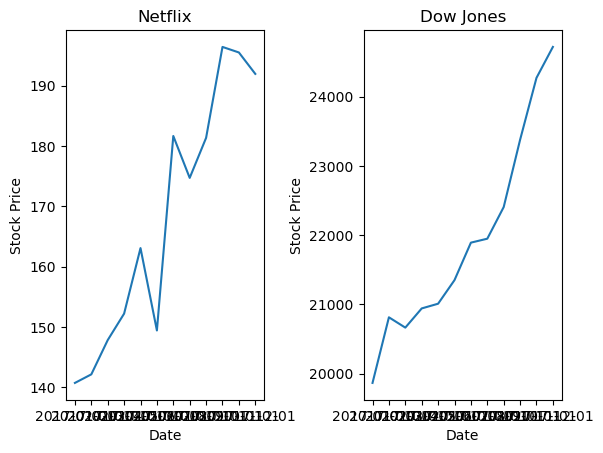

In [17]:
# Left plot Netflix
ax1 = plt.subplot(1, 2, 1)
plt.plot(netflix_stocks['Date'], netflix_stocks['Price'])
ax1.set_title("Netflix")
ax1.set_xlabel("Date")
ax1.set_ylabel("Stock Price")
plt.subplots_adjust(wspace= 0.5)




# Right plot Dow Jones
ax2 = plt.subplot(1, 2, 2)
plt.plot(dowjones_stocks['Date'], dowjones_stocks['Price'])
ax2.set_title("Dow Jones")
ax2.set_xlabel("Date")
ax2.set_ylabel("Stock Price")
plt.subplots_adjust(wspace=0.5)
plt.savefig("netflix_dowjones_subplot.png")
plt.show()


## And we are done! 